# Component Failure Analysis in Automobile Engineering and Manufacturing

- Everyday, we depend on many systems and machines. We use a car to
travel , a lift goes up and down, and a plane to fly. Electricity comes
through turbines and in a hospital machine keeps us alive. These systems
can fail. Some failures are just an inconvenience, while others could
mean life or death.


- Component Failure analysis is the process of analyzing the
component data or the component itself to determine the
reason(s) for degraded performance or catastrophic failure of
a component either, during component manufacturing,
performance testing, and during incoming inspection, or after
delivery to the customer, at the final application.


- Collecting and analyzing data is vital for deciding on
remedial action and preventing future occurrence.


- When stakes are high, we perform regular check and predictive analysis
on our systems.
For example, Lifts, cars are check once every few months and aircrafts
are checked on daily basis to avoid any accident.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# loading dataset

data_set= pd.read_excel("datasets/COMPONENT FAILURE DATA.xlsx")
df = data_set.copy()

In [3]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',10000)

In [121]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0


# Brief Description about  dataset
    
- This dataset reflects real component failure prediction encountered in the automobile and other industries with measurements from real equipment. 

### The features description: -

# The six features are: -

### 1. Type: the quality of the product, consisting of a letter L, M, or H.Meaning low, medium, and high, respectively.
### 2. Air temperature [K]: generated using a random walk process .
### 3. Process temperature [K]: generated using a random walk process .
### 4. Rotational speed [rpm]: calculated from power of 2860 W, overlaid with a normally distributed noise.
### 5. Torque [Nm]: torque values are normally distributed around 40 Nm
### 6. Tool wear: The quality variants H/M/L of tool wear in the process.

## The targets are:
### A. Target: failure or no failure (to perform binary classification).
### B. Failure Type: type of failure (to perform multiclass classification).

In [5]:
#Basic information about data
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
# checking for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
# checking for unique values in each column
for i in df.columns:
    print("**************************************",i,"***********************************************")
    print()
    print(df[i].unique())
    print("\n")

************************************** UDI ***********************************************

[    1     2     3 ...  9998  9999 10000]


************************************** Product ID ***********************************************

['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']


************************************** Type ***********************************************

['M' 'L' 'H']


************************************** Air temperature [K] ***********************************************

[298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 3

In [8]:
# Basic statistics about the data
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
# shape of the data
df.shape

(10000, 10)

In [10]:
# checking for duplicate values
df.duplicated().sum()
# no duplicate data

0

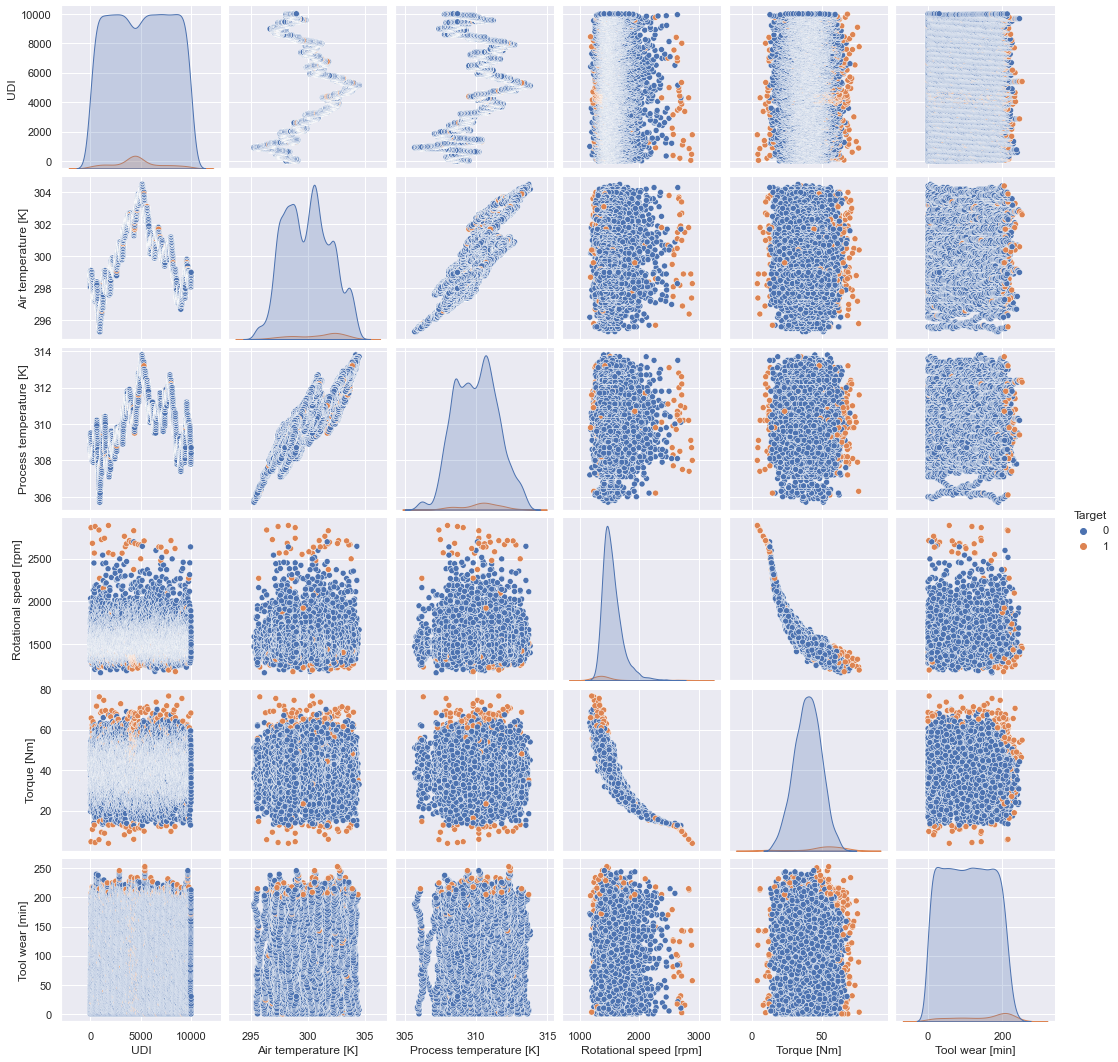

In [11]:
# pair plot to check relation among variables
sns.pairplot(df,hue='Target')

# obseravtion :
# Rotational speed and Torque are highly negatively correlated
# Failure amount increase at extreme low and high Roattional speed(-0.88)
# Process temperature and Air temperature highly positively correlated(0.88)

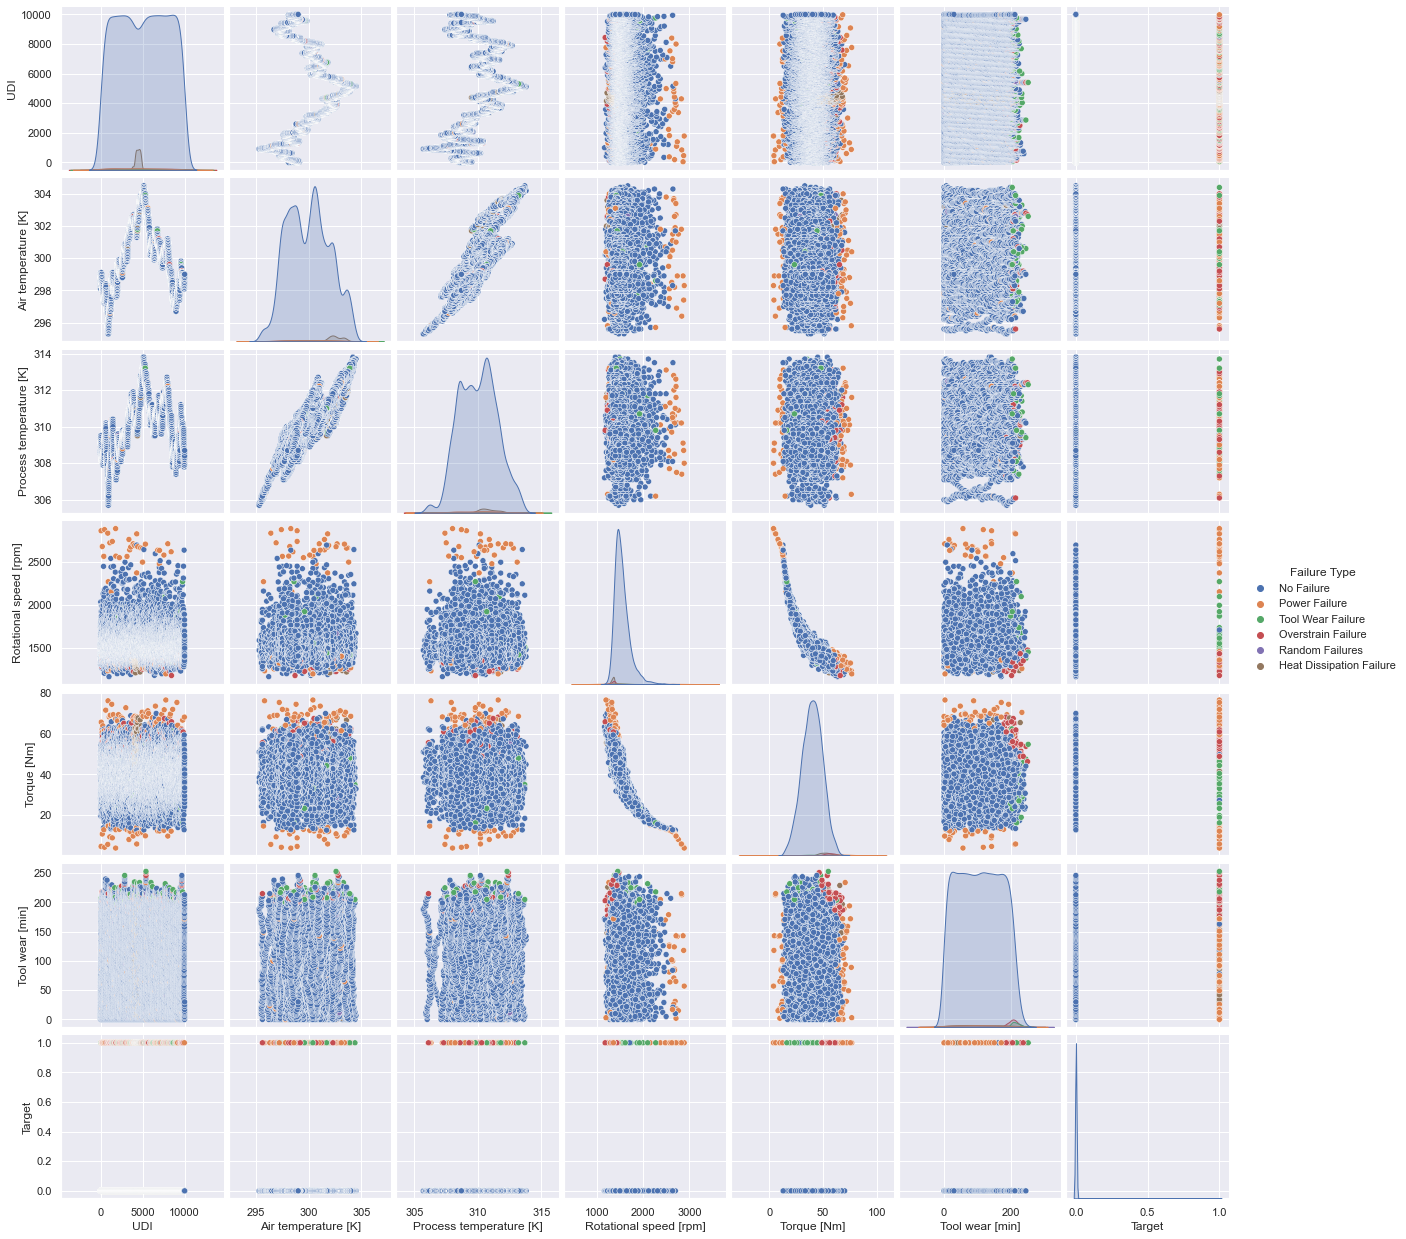

In [13]:
sns.pairplot(df,hue = 'Failure Type')

In [14]:
# checking for correlation among variables
df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<AxesSubplot:>

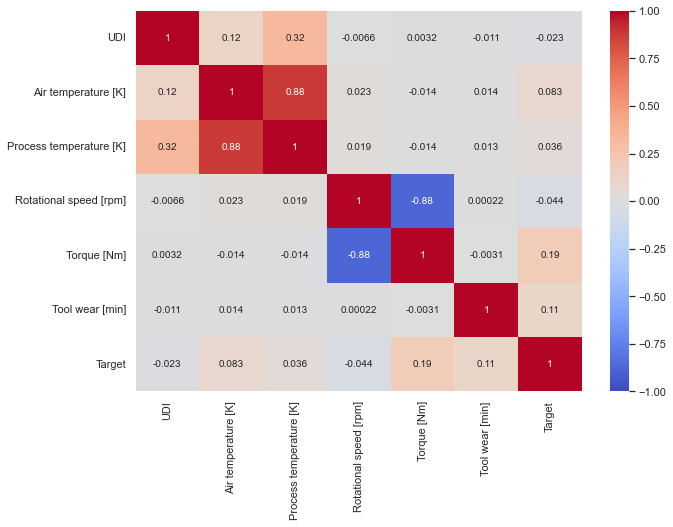

In [15]:
# PLotting heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot =True,cmap = 'coolwarm',vmin =-1,vmax =1)
# Process temperature and Air temperature are highly positively correlated
# Rotational speed and Torque are highle negatively correlated

# Binary classification with Target as dependent variable:

In [16]:
# Here we are ahving two output/target variables 
# first we will observe output with ont target variable so dropping 
# let's drop the unwanted columns and another target variable
df1 = df.drop(['UDI', 'Product ID','Failure Type'],axis=1)

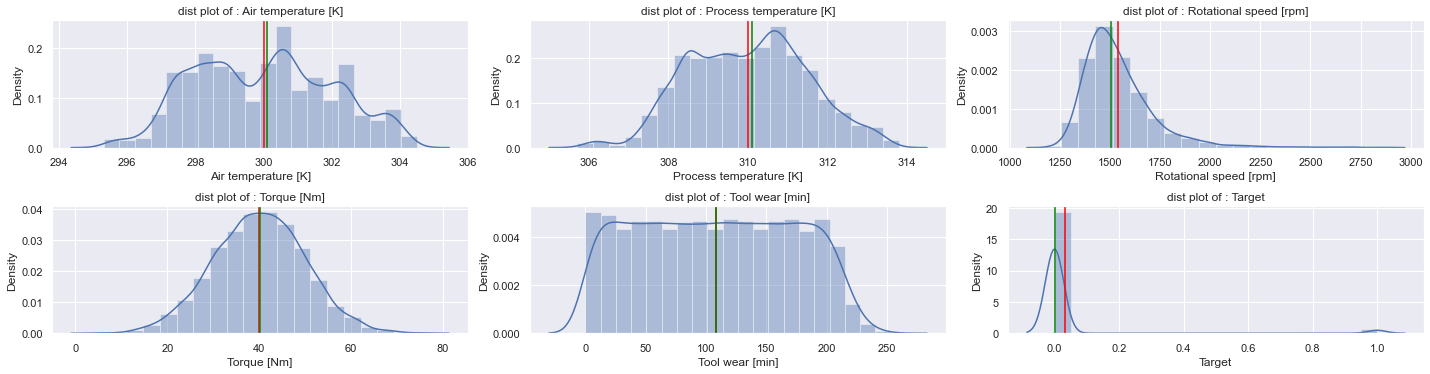

In [17]:
# distribution plot
plt.figure(figsize=(20,10))
index = df1.select_dtypes(exclude=('object')).columns
i = 1
for j in index:
    plt.subplot(4,3,i)
    sns.distplot(df[j],kde=True,bins=20)
    plt.axvline(df1[j].mean(),color = 'red')
    plt.axvline(df1[j].median(),color = 'green')
    plt.title(f'dist plot of : {j}')
    i += 1
    
plt.tight_layout()
plt.show()

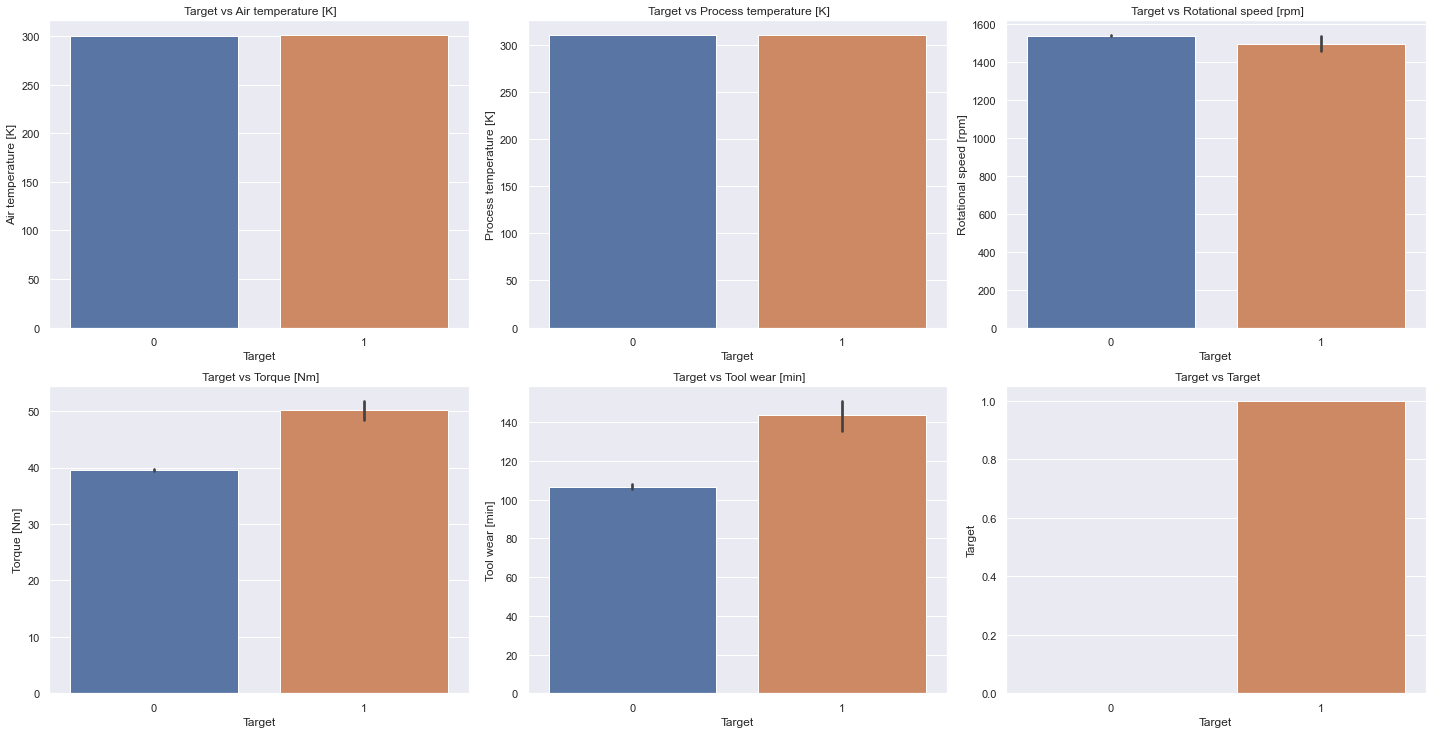

In [18]:
#  barplot for bivariate analysis:
plt.figure(figsize = (20,20))
index = df1.select_dtypes(exclude = ('object')).columns
i =1
for j in index:
    plt.subplot(4,3,i)
    sns.barplot(x =df1['Target'],y=df1[j])
    plt.title(f' Target vs {j}')
    i += 1
    
plt.tight_layout()
plt.show()

In [19]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'], dtype='object')

In [20]:
df1.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

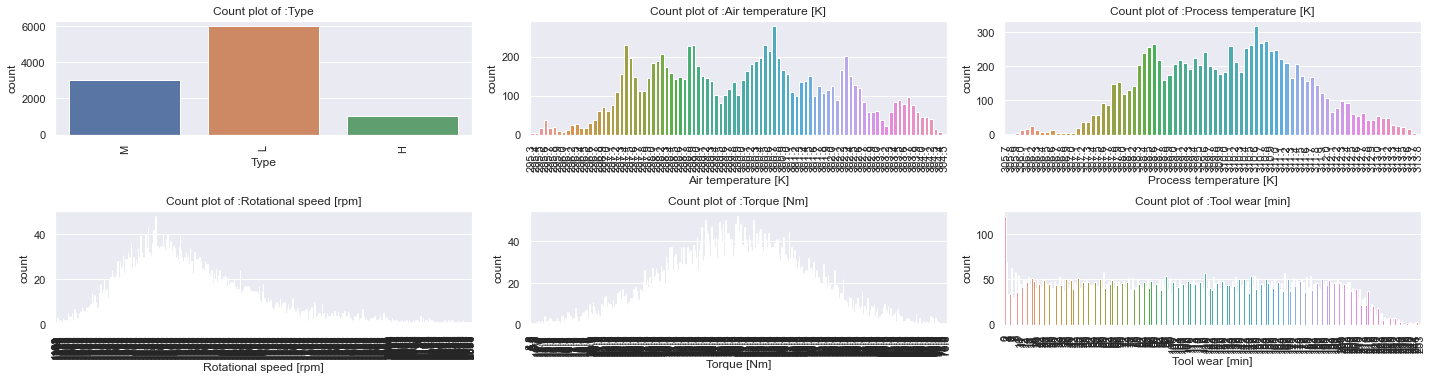

In [21]:
# count plot for univariate analysis:
plt.figure(figsize =(20,10))
index = df1.drop(columns = 'Target').columns
i = 1
for j in index:
    plt.subplot(4,3,i)
    sns.countplot(df1[j])
    plt.xticks(rotation =90)
    plt.title(f'Count plot of :{j}')
    i += 1
        
plt.tight_layout()
plt.show()

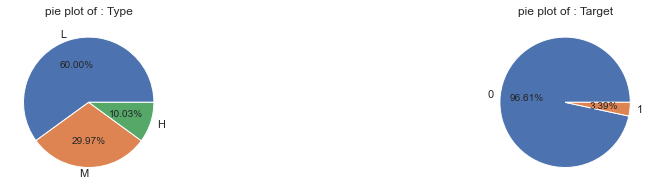

In [22]:
plt.figure(figsize = (20,10))
index = ['Type','Target']
i = 1
for j in index:
    plt.subplot(4,3,i)
    plt.pie(df1[j].value_counts(),labels = df1[j].value_counts().index,autopct ='%0.2f%%')
    plt.title(f'pie plot of : {j}')
    i += 1
    
plt.tight_layout()
plt.show()

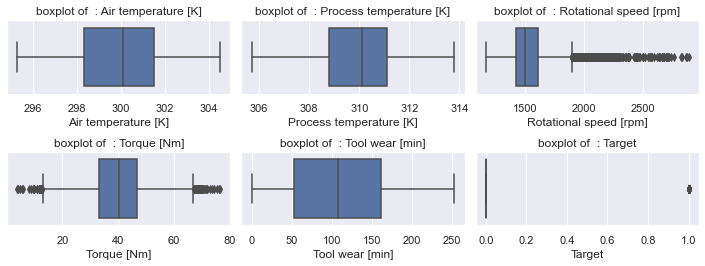

In [23]:
#  checking for outliers in data using boxplot
plt.figure(figsize =(10,7))
index = df1.select_dtypes(exclude =('object')).columns
i =1
for j in index:
    plt.subplot(4,3,i)
    sns.boxplot(df1[j])
    plt.title(f'boxplot of  : {j}')
    i += 1
plt.tight_layout()
plt.show()

In [24]:
df1['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [25]:
# percentage of failure in different quality of the the component

In [26]:
# Low quality:
df_type_l = df1[df1['Type']=='L']
df_type_l['Target'].value_counts(normalize =True)

0    0.960833
1    0.039167
Name: Target, dtype: float64

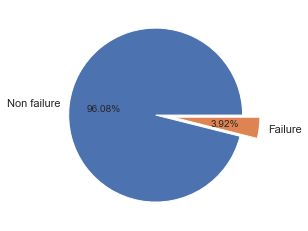

In [27]:
plt.pie(x = df_type_l['Target'].value_counts(),labels = ['Non failure','Failure'],autopct ="%1.2f%%",explode=[0,0.2])

plt.show()

In [28]:
# Medium quality
df_type_M = df1[df1['Type']=='M']
df_type_M['Target'].value_counts(normalize =True)

0    0.972306
1    0.027694
Name: Target, dtype: float64

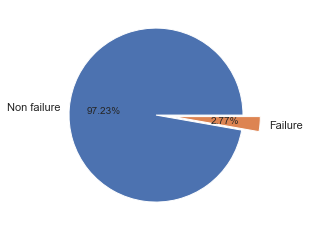

In [29]:
plt.pie(x = df_type_M['Target'].value_counts(),labels = ['Non failure','Failure'],autopct ="%1.2f%%",explode=[0,0.2])

plt.show()

In [30]:
# High quality
df_type_H = df1[df1['Type']=='H']
df_type_H['Target'].value_counts(normalize =True)


0    0.979063
1    0.020937
Name: Target, dtype: float64

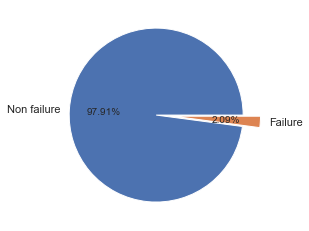

In [31]:
plt.pie(x = df_type_H['Target'].value_counts(),labels = ['Non failure','Failure'],autopct ="%1.2f%%",explode=[0,0.2])

plt.show()

In [32]:
# Observations :Low quality components have high chance of failure High quality components  even the difference is very low

In [33]:
# let's encode the Type feature
df1['Type'] = df1['Type'].map({'L':0,'M':1,'H':2})

In [34]:
# encoding Failure type feature also
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [35]:
df['Failure Type'] = df['Failure Type'].map({'No Failure' :0,       
'Heat Dissipation Failure' :1,    
'Power Failure' :2 ,              
'Overstrain Failure' :3,          
'Tool Wear Failure'  :4,          
'Random Failures' :5             })

In [36]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


In [37]:
# split into independent and dependent variables:
x = df1.drop(['Target'],axis=1)
y = df1['Target']

In [38]:
df1.dtypes

Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

In [46]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [49]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns= x.columns)

In [50]:
x_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1.0,-0.62500,-0.652174,0.253968,0.198529,-0.990826
1,0.0,-0.59375,-0.608696,-0.502646,0.455882,-0.963303
2,0.0,-0.62500,-0.695652,-0.026455,0.683824,-0.944954
3,0.0,-0.59375,-0.652174,-0.370370,-0.044118,-0.926606
4,0.0,-0.59375,-0.608696,-0.502646,-0.007353,-0.908257


In [51]:
#Case I:- target variable Target(yes / no failure )

In [52]:
y=df["Target"]# binary class

In [53]:
y.value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [54]:
# first let's try without balancing the data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =101,stratify = y)

In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 6) (2000, 6) (8000,) (2000,)


# Model Building:

In [58]:
# let's import necessary algorithms for model building:

In [59]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [60]:
rf=RandomForestClassifier()
bag=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
catboost = CatBoostClassifier()

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [62]:
from sklearn.model_selection import cross_validate

In [63]:
for model in [rf,bag,svc,dt,knn,catboost]:
    print("**********"*5)
    print("performance of model :",model)
    print("**********"*5)
    cv = StratifiedShuffleSplit(n_splits =5,random_state=42,test_size =0.25)
    scoring = ['f1_macro','precision_macro','recall_macro']
    cross_val_scores = cross_validate(model,x,y,scoring = scoring  )
    roc_auc_test_cv = round(cross_val_score(model,x,y,cv = cv,scoring ='roc_auc',n_jobs =-1).mean(),4)
    f1_test_cv = round(cross_val_scores['test_f1_macro'].mean(),4)
    precision_test_cv = round(cross_val_scores['test_precision_macro'].mean(),4)
    recall_test_cv = round(cross_val_scores['test_recall_macro'].mean(),4)
    
#     print metrics

    print(f"cross val roc_auc_test_data: {roc_auc_test_cv}")
    print(f'cross_f1_test_cv : {f1_test_cv}')
    print(f'precision_test_cv: {precision_test_cv}')
    print(f'recall_test_cross_cv: {recall_test_cv}')
          
          

**************************************************
performance of model : RandomForestClassifier()
**************************************************
cross val roc_auc_test_data: 0.9611
cross_f1_test_cv : 0.6912
precision_test_cv: 0.7946
recall_test_cross_cv: 0.7011
**************************************************
performance of model : BaggingClassifier()
**************************************************
cross val roc_auc_test_data: 0.9255
cross_f1_test_cv : 0.7001
precision_test_cv: 0.7808
recall_test_cross_cv: 0.7308
**************************************************
performance of model : SVC()
**************************************************
cross val roc_auc_test_data: 0.886
cross_f1_test_cv : 0.4942
precision_test_cv: 0.5331
recall_test_cross_cv: 0.5014
**************************************************
performance of model : DecisionTreeClassifier()
**************************************************
cross val roc_auc_test_data: 0.8324
cross_f1_test_cv : 0.6801
precision_te

157:	learn: 0.0470457	total: 728ms	remaining: 3.88s
158:	learn: 0.0467871	total: 733ms	remaining: 3.88s
159:	learn: 0.0467006	total: 737ms	remaining: 3.87s
160:	learn: 0.0465115	total: 742ms	remaining: 3.86s
161:	learn: 0.0464209	total: 746ms	remaining: 3.86s
162:	learn: 0.0463292	total: 750ms	remaining: 3.85s
163:	learn: 0.0462953	total: 756ms	remaining: 3.85s
164:	learn: 0.0462247	total: 760ms	remaining: 3.85s
165:	learn: 0.0460638	total: 764ms	remaining: 3.84s
166:	learn: 0.0458733	total: 768ms	remaining: 3.83s
167:	learn: 0.0456888	total: 772ms	remaining: 3.82s
168:	learn: 0.0455905	total: 776ms	remaining: 3.81s
169:	learn: 0.0455006	total: 780ms	remaining: 3.81s
170:	learn: 0.0452929	total: 783ms	remaining: 3.79s
171:	learn: 0.0451480	total: 787ms	remaining: 3.79s
172:	learn: 0.0449741	total: 790ms	remaining: 3.78s
173:	learn: 0.0448714	total: 794ms	remaining: 3.77s
174:	learn: 0.0447205	total: 797ms	remaining: 3.76s
175:	learn: 0.0445883	total: 800ms	remaining: 3.75s
176:	learn: 

315:	learn: 0.0344433	total: 1.63s	remaining: 3.53s
316:	learn: 0.0344352	total: 1.64s	remaining: 3.53s
317:	learn: 0.0344035	total: 1.65s	remaining: 3.54s
318:	learn: 0.0343657	total: 1.66s	remaining: 3.54s
319:	learn: 0.0342927	total: 1.66s	remaining: 3.54s
320:	learn: 0.0342682	total: 1.67s	remaining: 3.54s
321:	learn: 0.0341542	total: 1.68s	remaining: 3.54s
322:	learn: 0.0340401	total: 1.69s	remaining: 3.54s
323:	learn: 0.0339901	total: 1.7s	remaining: 3.54s
324:	learn: 0.0339562	total: 1.7s	remaining: 3.53s
325:	learn: 0.0339212	total: 1.71s	remaining: 3.53s
326:	learn: 0.0338778	total: 1.71s	remaining: 3.53s
327:	learn: 0.0337959	total: 1.72s	remaining: 3.52s
328:	learn: 0.0337732	total: 1.73s	remaining: 3.52s
329:	learn: 0.0337164	total: 1.74s	remaining: 3.53s
330:	learn: 0.0336394	total: 1.74s	remaining: 3.52s
331:	learn: 0.0335791	total: 1.75s	remaining: 3.52s
332:	learn: 0.0335599	total: 1.75s	remaining: 3.52s
333:	learn: 0.0334992	total: 1.76s	remaining: 3.51s
334:	learn: 0.

490:	learn: 0.0262946	total: 2.9s	remaining: 3.01s
491:	learn: 0.0262151	total: 2.91s	remaining: 3s
492:	learn: 0.0261964	total: 2.92s	remaining: 3s
493:	learn: 0.0261802	total: 2.93s	remaining: 3s
494:	learn: 0.0261543	total: 2.93s	remaining: 2.99s
495:	learn: 0.0261034	total: 2.94s	remaining: 2.99s
496:	learn: 0.0260645	total: 2.95s	remaining: 2.99s
497:	learn: 0.0260373	total: 2.96s	remaining: 2.98s
498:	learn: 0.0259933	total: 2.97s	remaining: 2.98s
499:	learn: 0.0259651	total: 2.98s	remaining: 2.98s
500:	learn: 0.0259332	total: 2.98s	remaining: 2.97s
501:	learn: 0.0259025	total: 2.99s	remaining: 2.97s
502:	learn: 0.0258800	total: 3s	remaining: 2.96s
503:	learn: 0.0258653	total: 3.01s	remaining: 2.96s
504:	learn: 0.0258256	total: 3.02s	remaining: 2.96s
505:	learn: 0.0257487	total: 3.02s	remaining: 2.95s
506:	learn: 0.0257242	total: 3.03s	remaining: 2.94s
507:	learn: 0.0256838	total: 3.04s	remaining: 2.94s
508:	learn: 0.0256705	total: 3.04s	remaining: 2.94s
509:	learn: 0.0256230	tot

674:	learn: 0.0208655	total: 4.17s	remaining: 2.01s
675:	learn: 0.0208389	total: 4.18s	remaining: 2s
676:	learn: 0.0208157	total: 4.19s	remaining: 2s
677:	learn: 0.0207559	total: 4.2s	remaining: 1.99s
678:	learn: 0.0207452	total: 4.2s	remaining: 1.99s
679:	learn: 0.0207121	total: 4.21s	remaining: 1.98s
680:	learn: 0.0206785	total: 4.22s	remaining: 1.98s
681:	learn: 0.0206421	total: 4.23s	remaining: 1.97s
682:	learn: 0.0206350	total: 4.23s	remaining: 1.97s
683:	learn: 0.0206228	total: 4.24s	remaining: 1.96s
684:	learn: 0.0205987	total: 4.25s	remaining: 1.95s
685:	learn: 0.0205778	total: 4.25s	remaining: 1.95s
686:	learn: 0.0205553	total: 4.26s	remaining: 1.94s
687:	learn: 0.0205353	total: 4.27s	remaining: 1.94s
688:	learn: 0.0205040	total: 4.28s	remaining: 1.93s
689:	learn: 0.0204821	total: 4.28s	remaining: 1.92s
690:	learn: 0.0204691	total: 4.29s	remaining: 1.92s
691:	learn: 0.0204367	total: 4.3s	remaining: 1.91s
692:	learn: 0.0204315	total: 4.3s	remaining: 1.91s
693:	learn: 0.0204014	

852:	learn: 0.0172779	total: 5.24s	remaining: 902ms
853:	learn: 0.0172556	total: 5.24s	remaining: 896ms
854:	learn: 0.0172465	total: 5.24s	remaining: 889ms
855:	learn: 0.0172378	total: 5.25s	remaining: 883ms
856:	learn: 0.0172289	total: 5.25s	remaining: 876ms
857:	learn: 0.0171970	total: 5.25s	remaining: 870ms
858:	learn: 0.0171760	total: 5.26s	remaining: 863ms
859:	learn: 0.0171571	total: 5.26s	remaining: 856ms
860:	learn: 0.0171314	total: 5.26s	remaining: 850ms
861:	learn: 0.0171179	total: 5.27s	remaining: 843ms
862:	learn: 0.0170985	total: 5.27s	remaining: 837ms
863:	learn: 0.0170831	total: 5.27s	remaining: 830ms
864:	learn: 0.0170714	total: 5.28s	remaining: 824ms
865:	learn: 0.0170360	total: 5.28s	remaining: 817ms
866:	learn: 0.0170233	total: 5.28s	remaining: 811ms
867:	learn: 0.0170136	total: 5.29s	remaining: 804ms
868:	learn: 0.0169965	total: 5.29s	remaining: 798ms
869:	learn: 0.0169836	total: 5.29s	remaining: 791ms
870:	learn: 0.0169670	total: 5.3s	remaining: 785ms
871:	learn: 0

25:	learn: 0.1654435	total: 192ms	remaining: 7.2s
26:	learn: 0.1575347	total: 201ms	remaining: 7.24s
27:	learn: 0.1523494	total: 209ms	remaining: 7.27s
28:	learn: 0.1455348	total: 217ms	remaining: 7.27s
29:	learn: 0.1396593	total: 225ms	remaining: 7.27s
30:	learn: 0.1355009	total: 231ms	remaining: 7.23s
31:	learn: 0.1292792	total: 239ms	remaining: 7.22s
32:	learn: 0.1250126	total: 245ms	remaining: 7.18s
33:	learn: 0.1214958	total: 250ms	remaining: 7.11s
34:	learn: 0.1194093	total: 257ms	remaining: 7.1s
35:	learn: 0.1148799	total: 265ms	remaining: 7.09s
36:	learn: 0.1120419	total: 272ms	remaining: 7.09s
37:	learn: 0.1093492	total: 281ms	remaining: 7.11s
38:	learn: 0.1062715	total: 290ms	remaining: 7.13s
39:	learn: 0.1040597	total: 297ms	remaining: 7.14s
40:	learn: 0.1019519	total: 305ms	remaining: 7.14s
41:	learn: 0.0986661	total: 311ms	remaining: 7.1s
42:	learn: 0.0967665	total: 317ms	remaining: 7.07s
43:	learn: 0.0951365	total: 324ms	remaining: 7.04s
44:	learn: 0.0935385	total: 331ms	

185:	learn: 0.0412688	total: 1.27s	remaining: 5.58s
186:	learn: 0.0410719	total: 1.28s	remaining: 5.58s
187:	learn: 0.0410350	total: 1.29s	remaining: 5.58s
188:	learn: 0.0409629	total: 1.3s	remaining: 5.58s
189:	learn: 0.0408085	total: 1.31s	remaining: 5.57s
190:	learn: 0.0407407	total: 1.31s	remaining: 5.57s
191:	learn: 0.0405507	total: 1.32s	remaining: 5.56s
192:	learn: 0.0404093	total: 1.33s	remaining: 5.55s
193:	learn: 0.0403229	total: 1.33s	remaining: 5.54s
194:	learn: 0.0402520	total: 1.34s	remaining: 5.53s
195:	learn: 0.0402190	total: 1.34s	remaining: 5.52s
196:	learn: 0.0401727	total: 1.35s	remaining: 5.5s
197:	learn: 0.0401230	total: 1.35s	remaining: 5.49s
198:	learn: 0.0400363	total: 1.36s	remaining: 5.47s
199:	learn: 0.0399690	total: 1.36s	remaining: 5.46s
200:	learn: 0.0399351	total: 1.37s	remaining: 5.44s
201:	learn: 0.0399044	total: 1.37s	remaining: 5.42s
202:	learn: 0.0397876	total: 1.38s	remaining: 5.41s
203:	learn: 0.0397349	total: 1.38s	remaining: 5.38s
204:	learn: 0.

361:	learn: 0.0302605	total: 2.38s	remaining: 4.2s
362:	learn: 0.0302289	total: 2.39s	remaining: 4.19s
363:	learn: 0.0301957	total: 2.39s	remaining: 4.18s
364:	learn: 0.0301810	total: 2.4s	remaining: 4.18s
365:	learn: 0.0301486	total: 2.41s	remaining: 4.17s
366:	learn: 0.0300917	total: 2.42s	remaining: 4.17s
367:	learn: 0.0300162	total: 2.42s	remaining: 4.16s
368:	learn: 0.0299734	total: 2.43s	remaining: 4.16s
369:	learn: 0.0299234	total: 2.44s	remaining: 4.15s
370:	learn: 0.0298856	total: 2.44s	remaining: 4.14s
371:	learn: 0.0298373	total: 2.45s	remaining: 4.14s
372:	learn: 0.0297783	total: 2.46s	remaining: 4.13s
373:	learn: 0.0297700	total: 2.46s	remaining: 4.13s
374:	learn: 0.0297394	total: 2.47s	remaining: 4.12s
375:	learn: 0.0297240	total: 2.48s	remaining: 4.12s
376:	learn: 0.0296524	total: 2.49s	remaining: 4.11s
377:	learn: 0.0296416	total: 2.49s	remaining: 4.1s
378:	learn: 0.0295729	total: 2.5s	remaining: 4.1s
379:	learn: 0.0295434	total: 2.51s	remaining: 4.09s
380:	learn: 0.029

533:	learn: 0.0246706	total: 3.63s	remaining: 3.17s
534:	learn: 0.0246532	total: 3.64s	remaining: 3.16s
535:	learn: 0.0246120	total: 3.65s	remaining: 3.15s
536:	learn: 0.0245445	total: 3.65s	remaining: 3.15s
537:	learn: 0.0245388	total: 3.66s	remaining: 3.14s
538:	learn: 0.0244899	total: 3.67s	remaining: 3.13s
539:	learn: 0.0244603	total: 3.67s	remaining: 3.13s
540:	learn: 0.0244432	total: 3.68s	remaining: 3.12s
541:	learn: 0.0244235	total: 3.69s	remaining: 3.12s
542:	learn: 0.0243820	total: 3.69s	remaining: 3.11s
543:	learn: 0.0243098	total: 3.7s	remaining: 3.1s
544:	learn: 0.0243039	total: 3.71s	remaining: 3.1s
545:	learn: 0.0242819	total: 3.71s	remaining: 3.09s
546:	learn: 0.0242440	total: 3.72s	remaining: 3.08s
547:	learn: 0.0242277	total: 3.73s	remaining: 3.08s
548:	learn: 0.0241785	total: 3.74s	remaining: 3.07s
549:	learn: 0.0241729	total: 3.74s	remaining: 3.06s
550:	learn: 0.0241542	total: 3.75s	remaining: 3.06s
551:	learn: 0.0240950	total: 3.76s	remaining: 3.05s
552:	learn: 0.0

709:	learn: 0.0199941	total: 4.89s	remaining: 2s
710:	learn: 0.0199792	total: 4.9s	remaining: 1.99s
711:	learn: 0.0199583	total: 4.9s	remaining: 1.98s
712:	learn: 0.0199244	total: 4.91s	remaining: 1.98s
713:	learn: 0.0199007	total: 4.92s	remaining: 1.97s
714:	learn: 0.0198871	total: 4.93s	remaining: 1.96s
715:	learn: 0.0198750	total: 4.93s	remaining: 1.96s
716:	learn: 0.0198548	total: 4.94s	remaining: 1.95s
717:	learn: 0.0198360	total: 4.95s	remaining: 1.94s
718:	learn: 0.0198070	total: 4.95s	remaining: 1.94s
719:	learn: 0.0197873	total: 4.96s	remaining: 1.93s
720:	learn: 0.0197408	total: 4.97s	remaining: 1.92s
721:	learn: 0.0197139	total: 4.97s	remaining: 1.92s
722:	learn: 0.0196857	total: 4.98s	remaining: 1.91s
723:	learn: 0.0196761	total: 4.99s	remaining: 1.9s
724:	learn: 0.0196545	total: 5s	remaining: 1.9s
725:	learn: 0.0196435	total: 5s	remaining: 1.89s
726:	learn: 0.0196177	total: 5.01s	remaining: 1.88s
727:	learn: 0.0196077	total: 5.02s	remaining: 1.87s
728:	learn: 0.0195965	tot

873:	learn: 0.0166576	total: 5.96s	remaining: 860ms
874:	learn: 0.0166323	total: 5.97s	remaining: 853ms
875:	learn: 0.0166237	total: 5.97s	remaining: 846ms
876:	learn: 0.0165967	total: 5.98s	remaining: 839ms
877:	learn: 0.0165857	total: 5.99s	remaining: 832ms
878:	learn: 0.0165774	total: 6s	remaining: 825ms
879:	learn: 0.0165718	total: 6s	remaining: 818ms
880:	learn: 0.0165629	total: 6.01s	remaining: 812ms
881:	learn: 0.0165540	total: 6.02s	remaining: 805ms
882:	learn: 0.0165380	total: 6.02s	remaining: 798ms
883:	learn: 0.0165124	total: 6.03s	remaining: 791ms
884:	learn: 0.0165038	total: 6.04s	remaining: 785ms
885:	learn: 0.0164937	total: 6.04s	remaining: 778ms
886:	learn: 0.0164777	total: 6.05s	remaining: 771ms
887:	learn: 0.0164628	total: 6.06s	remaining: 764ms
888:	learn: 0.0164474	total: 6.07s	remaining: 757ms
889:	learn: 0.0164377	total: 6.07s	remaining: 751ms
890:	learn: 0.0164062	total: 6.08s	remaining: 744ms
891:	learn: 0.0163836	total: 6.08s	remaining: 737ms
892:	learn: 0.0163

37:	learn: 0.0950260	total: 225ms	remaining: 5.7s
38:	learn: 0.0924806	total: 229ms	remaining: 5.65s
39:	learn: 0.0902613	total: 234ms	remaining: 5.61s
40:	learn: 0.0882422	total: 238ms	remaining: 5.57s
41:	learn: 0.0861222	total: 242ms	remaining: 5.51s
42:	learn: 0.0850379	total: 245ms	remaining: 5.45s
43:	learn: 0.0838123	total: 249ms	remaining: 5.41s
44:	learn: 0.0829620	total: 252ms	remaining: 5.35s
45:	learn: 0.0810675	total: 256ms	remaining: 5.3s
46:	learn: 0.0794517	total: 259ms	remaining: 5.26s
47:	learn: 0.0781411	total: 263ms	remaining: 5.22s
48:	learn: 0.0770767	total: 267ms	remaining: 5.18s
49:	learn: 0.0757530	total: 271ms	remaining: 5.14s
50:	learn: 0.0745901	total: 275ms	remaining: 5.11s
51:	learn: 0.0728793	total: 278ms	remaining: 5.08s
52:	learn: 0.0719841	total: 282ms	remaining: 5.05s
53:	learn: 0.0707874	total: 286ms	remaining: 5.01s
54:	learn: 0.0698772	total: 290ms	remaining: 4.98s
55:	learn: 0.0690869	total: 293ms	remaining: 4.95s
56:	learn: 0.0682032	total: 297ms

242:	learn: 0.0336721	total: 928ms	remaining: 2.89s
243:	learn: 0.0335925	total: 934ms	remaining: 2.89s
244:	learn: 0.0335264	total: 937ms	remaining: 2.89s
245:	learn: 0.0334354	total: 941ms	remaining: 2.88s
246:	learn: 0.0333822	total: 944ms	remaining: 2.88s
247:	learn: 0.0333356	total: 948ms	remaining: 2.87s
248:	learn: 0.0332668	total: 951ms	remaining: 2.87s
249:	learn: 0.0331742	total: 954ms	remaining: 2.86s
250:	learn: 0.0331149	total: 960ms	remaining: 2.87s
251:	learn: 0.0330442	total: 966ms	remaining: 2.87s
252:	learn: 0.0330017	total: 972ms	remaining: 2.87s
253:	learn: 0.0329432	total: 978ms	remaining: 2.87s
254:	learn: 0.0328948	total: 985ms	remaining: 2.88s
255:	learn: 0.0328127	total: 989ms	remaining: 2.87s
256:	learn: 0.0327834	total: 992ms	remaining: 2.87s
257:	learn: 0.0327601	total: 996ms	remaining: 2.86s
258:	learn: 0.0327018	total: 1000ms	remaining: 2.86s
259:	learn: 0.0326540	total: 1s	remaining: 2.86s
260:	learn: 0.0326176	total: 1.01s	remaining: 2.85s
261:	learn: 0.

456:	learn: 0.0243688	total: 1.82s	remaining: 2.16s
457:	learn: 0.0243354	total: 1.82s	remaining: 2.15s
458:	learn: 0.0243005	total: 1.82s	remaining: 2.15s
459:	learn: 0.0242734	total: 1.83s	remaining: 2.14s
460:	learn: 0.0242452	total: 1.83s	remaining: 2.14s
461:	learn: 0.0242022	total: 1.83s	remaining: 2.13s
462:	learn: 0.0241768	total: 1.83s	remaining: 2.13s
463:	learn: 0.0241464	total: 1.84s	remaining: 2.12s
464:	learn: 0.0241098	total: 1.84s	remaining: 2.12s
465:	learn: 0.0240786	total: 1.85s	remaining: 2.12s
466:	learn: 0.0240436	total: 1.85s	remaining: 2.12s
467:	learn: 0.0240206	total: 1.86s	remaining: 2.11s
468:	learn: 0.0240022	total: 1.86s	remaining: 2.11s
469:	learn: 0.0239723	total: 1.86s	remaining: 2.1s
470:	learn: 0.0239372	total: 1.87s	remaining: 2.1s
471:	learn: 0.0238960	total: 1.87s	remaining: 2.09s
472:	learn: 0.0238855	total: 1.87s	remaining: 2.09s
473:	learn: 0.0238604	total: 1.88s	remaining: 2.08s
474:	learn: 0.0238276	total: 1.88s	remaining: 2.08s
475:	learn: 0.

648:	learn: 0.0191050	total: 2.53s	remaining: 1.37s
649:	learn: 0.0190828	total: 2.54s	remaining: 1.37s
650:	learn: 0.0190560	total: 2.55s	remaining: 1.36s
651:	learn: 0.0190365	total: 2.55s	remaining: 1.36s
652:	learn: 0.0190041	total: 2.56s	remaining: 1.36s
653:	learn: 0.0189737	total: 2.56s	remaining: 1.36s
654:	learn: 0.0189524	total: 2.57s	remaining: 1.35s
655:	learn: 0.0189219	total: 2.57s	remaining: 1.35s
656:	learn: 0.0189112	total: 2.58s	remaining: 1.34s
657:	learn: 0.0188899	total: 2.58s	remaining: 1.34s
658:	learn: 0.0188722	total: 2.58s	remaining: 1.34s
659:	learn: 0.0188421	total: 2.59s	remaining: 1.33s
660:	learn: 0.0188182	total: 2.59s	remaining: 1.33s
661:	learn: 0.0187642	total: 2.6s	remaining: 1.33s
662:	learn: 0.0187474	total: 2.6s	remaining: 1.32s
663:	learn: 0.0187351	total: 2.61s	remaining: 1.32s
664:	learn: 0.0187096	total: 2.61s	remaining: 1.31s
665:	learn: 0.0186840	total: 2.61s	remaining: 1.31s
666:	learn: 0.0186737	total: 2.62s	remaining: 1.31s
667:	learn: 0.

824:	learn: 0.0155269	total: 3.24s	remaining: 688ms
825:	learn: 0.0155062	total: 3.25s	remaining: 684ms
826:	learn: 0.0154925	total: 3.25s	remaining: 680ms
827:	learn: 0.0154772	total: 3.25s	remaining: 676ms
828:	learn: 0.0154582	total: 3.26s	remaining: 673ms
829:	learn: 0.0154415	total: 3.27s	remaining: 669ms
830:	learn: 0.0154214	total: 3.27s	remaining: 665ms
831:	learn: 0.0154072	total: 3.28s	remaining: 662ms
832:	learn: 0.0153820	total: 3.28s	remaining: 658ms
833:	learn: 0.0153688	total: 3.29s	remaining: 655ms
834:	learn: 0.0153493	total: 3.3s	remaining: 652ms
835:	learn: 0.0153357	total: 3.3s	remaining: 648ms
836:	learn: 0.0153016	total: 3.31s	remaining: 645ms
837:	learn: 0.0152811	total: 3.32s	remaining: 641ms
838:	learn: 0.0152629	total: 3.32s	remaining: 638ms
839:	learn: 0.0152475	total: 3.33s	remaining: 634ms
840:	learn: 0.0152328	total: 3.34s	remaining: 631ms
841:	learn: 0.0152195	total: 3.34s	remaining: 627ms
842:	learn: 0.0152108	total: 3.35s	remaining: 624ms
843:	learn: 0.

986:	learn: 0.0134215	total: 4.33s	remaining: 57ms
987:	learn: 0.0134065	total: 4.33s	remaining: 52.6ms
988:	learn: 0.0133978	total: 4.34s	remaining: 48.3ms
989:	learn: 0.0133653	total: 4.35s	remaining: 43.9ms
990:	learn: 0.0133587	total: 4.36s	remaining: 39.6ms
991:	learn: 0.0133458	total: 4.36s	remaining: 35.2ms
992:	learn: 0.0133257	total: 4.37s	remaining: 30.8ms
993:	learn: 0.0133033	total: 4.38s	remaining: 26.4ms
994:	learn: 0.0132909	total: 4.38s	remaining: 22ms
995:	learn: 0.0132795	total: 4.39s	remaining: 17.6ms
996:	learn: 0.0132732	total: 4.4s	remaining: 13.2ms
997:	learn: 0.0132679	total: 4.41s	remaining: 8.83ms
998:	learn: 0.0132618	total: 4.41s	remaining: 4.42ms
999:	learn: 0.0132465	total: 4.42s	remaining: 0us
Learning rate set to 0.025035
0:	learn: 0.6490452	total: 7.41ms	remaining: 7.4s
1:	learn: 0.6031148	total: 15.9ms	remaining: 7.92s
2:	learn: 0.5639384	total: 23.4ms	remaining: 7.78s
3:	learn: 0.5251721	total: 30.7ms	remaining: 7.64s
4:	learn: 0.4878423	total: 37.8ms

152:	learn: 0.0431428	total: 1.1s	remaining: 6.12s
153:	learn: 0.0430629	total: 1.11s	remaining: 6.11s
154:	learn: 0.0428565	total: 1.12s	remaining: 6.1s
155:	learn: 0.0426901	total: 1.13s	remaining: 6.09s
156:	learn: 0.0425358	total: 1.13s	remaining: 6.08s
157:	learn: 0.0424879	total: 1.14s	remaining: 6.07s
158:	learn: 0.0422776	total: 1.15s	remaining: 6.06s
159:	learn: 0.0422170	total: 1.15s	remaining: 6.05s
160:	learn: 0.0421529	total: 1.16s	remaining: 6.04s
161:	learn: 0.0421180	total: 1.17s	remaining: 6.04s
162:	learn: 0.0419088	total: 1.18s	remaining: 6.03s
163:	learn: 0.0417712	total: 1.18s	remaining: 6.03s
164:	learn: 0.0417029	total: 1.19s	remaining: 6.03s
165:	learn: 0.0415093	total: 1.2s	remaining: 6.03s
166:	learn: 0.0413306	total: 1.21s	remaining: 6.02s
167:	learn: 0.0411804	total: 1.22s	remaining: 6.02s
168:	learn: 0.0410198	total: 1.22s	remaining: 6.02s
169:	learn: 0.0409630	total: 1.23s	remaining: 6.01s
170:	learn: 0.0407254	total: 1.24s	remaining: 6.01s
171:	learn: 0.0

311:	learn: 0.0304843	total: 2.17s	remaining: 4.8s
312:	learn: 0.0303779	total: 2.18s	remaining: 4.79s
313:	learn: 0.0303544	total: 2.19s	remaining: 4.79s
314:	learn: 0.0303017	total: 2.2s	remaining: 4.78s
315:	learn: 0.0302481	total: 2.21s	remaining: 4.77s
316:	learn: 0.0301882	total: 2.21s	remaining: 4.77s
317:	learn: 0.0300826	total: 2.22s	remaining: 4.76s
318:	learn: 0.0300500	total: 2.23s	remaining: 4.76s
319:	learn: 0.0300237	total: 2.24s	remaining: 4.75s
320:	learn: 0.0299913	total: 2.25s	remaining: 4.75s
321:	learn: 0.0299440	total: 2.26s	remaining: 4.75s
322:	learn: 0.0298848	total: 2.26s	remaining: 4.75s
323:	learn: 0.0298349	total: 2.27s	remaining: 4.73s
324:	learn: 0.0297911	total: 2.27s	remaining: 4.72s
325:	learn: 0.0297787	total: 2.28s	remaining: 4.71s
326:	learn: 0.0297440	total: 2.28s	remaining: 4.7s
327:	learn: 0.0297295	total: 2.29s	remaining: 4.69s
328:	learn: 0.0296713	total: 2.29s	remaining: 4.68s
329:	learn: 0.0296255	total: 2.3s	remaining: 4.67s
330:	learn: 0.02

470:	learn: 0.0243702	total: 3.26s	remaining: 3.66s
471:	learn: 0.0243401	total: 3.27s	remaining: 3.65s
472:	learn: 0.0243243	total: 3.27s	remaining: 3.65s
473:	learn: 0.0243016	total: 3.28s	remaining: 3.64s
474:	learn: 0.0242674	total: 3.29s	remaining: 3.64s
475:	learn: 0.0242223	total: 3.3s	remaining: 3.63s
476:	learn: 0.0241865	total: 3.31s	remaining: 3.62s
477:	learn: 0.0241503	total: 3.31s	remaining: 3.62s
478:	learn: 0.0240827	total: 3.33s	remaining: 3.62s
479:	learn: 0.0240486	total: 3.33s	remaining: 3.61s
480:	learn: 0.0240044	total: 3.34s	remaining: 3.61s
481:	learn: 0.0239817	total: 3.35s	remaining: 3.6s
482:	learn: 0.0239590	total: 3.36s	remaining: 3.59s
483:	learn: 0.0239258	total: 3.37s	remaining: 3.59s
484:	learn: 0.0239183	total: 3.37s	remaining: 3.58s
485:	learn: 0.0239106	total: 3.38s	remaining: 3.57s
486:	learn: 0.0239016	total: 3.39s	remaining: 3.57s
487:	learn: 0.0238695	total: 3.39s	remaining: 3.56s
488:	learn: 0.0238237	total: 3.4s	remaining: 3.56s
489:	learn: 0.0

651:	learn: 0.0198008	total: 4.53s	remaining: 2.42s
652:	learn: 0.0197849	total: 4.53s	remaining: 2.41s
653:	learn: 0.0197703	total: 4.54s	remaining: 2.4s
654:	learn: 0.0197485	total: 4.54s	remaining: 2.39s
655:	learn: 0.0197304	total: 4.55s	remaining: 2.39s
656:	learn: 0.0197080	total: 4.56s	remaining: 2.38s
657:	learn: 0.0196939	total: 4.56s	remaining: 2.37s
658:	learn: 0.0196787	total: 4.56s	remaining: 2.36s
659:	learn: 0.0196521	total: 4.57s	remaining: 2.35s
660:	learn: 0.0196240	total: 4.57s	remaining: 2.35s
661:	learn: 0.0196034	total: 4.58s	remaining: 2.34s
662:	learn: 0.0195649	total: 4.58s	remaining: 2.33s
663:	learn: 0.0195082	total: 4.59s	remaining: 2.32s
664:	learn: 0.0194671	total: 4.59s	remaining: 2.31s
665:	learn: 0.0194615	total: 4.6s	remaining: 2.31s
666:	learn: 0.0194126	total: 4.61s	remaining: 2.3s
667:	learn: 0.0193581	total: 4.62s	remaining: 2.29s
668:	learn: 0.0193227	total: 4.62s	remaining: 2.29s
669:	learn: 0.0192977	total: 4.63s	remaining: 2.28s
670:	learn: 0.0

829:	learn: 0.0159815	total: 5.79s	remaining: 1.18s
830:	learn: 0.0159639	total: 5.79s	remaining: 1.18s
831:	learn: 0.0159411	total: 5.8s	remaining: 1.17s
832:	learn: 0.0159340	total: 5.81s	remaining: 1.16s
833:	learn: 0.0159254	total: 5.82s	remaining: 1.16s
834:	learn: 0.0159035	total: 5.83s	remaining: 1.15s
835:	learn: 0.0158932	total: 5.83s	remaining: 1.14s
836:	learn: 0.0158836	total: 5.84s	remaining: 1.14s
837:	learn: 0.0158526	total: 5.85s	remaining: 1.13s
838:	learn: 0.0158166	total: 5.86s	remaining: 1.12s
839:	learn: 0.0158071	total: 5.86s	remaining: 1.12s
840:	learn: 0.0157996	total: 5.87s	remaining: 1.11s
841:	learn: 0.0157767	total: 5.88s	remaining: 1.1s
842:	learn: 0.0157639	total: 5.89s	remaining: 1.1s
843:	learn: 0.0157530	total: 5.89s	remaining: 1.09s
844:	learn: 0.0157399	total: 5.9s	remaining: 1.08s
845:	learn: 0.0157333	total: 5.91s	remaining: 1.07s
846:	learn: 0.0157121	total: 5.91s	remaining: 1.07s
847:	learn: 0.0157052	total: 5.92s	remaining: 1.06s
848:	learn: 0.01

Learning rate set to 0.025035
0:	learn: 0.6482434	total: 5.77ms	remaining: 5.77s
1:	learn: 0.6013141	total: 10.5ms	remaining: 5.25s
2:	learn: 0.5678232	total: 14ms	remaining: 4.66s
3:	learn: 0.5295510	total: 17.4ms	remaining: 4.33s
4:	learn: 0.4913083	total: 20.7ms	remaining: 4.12s
5:	learn: 0.4630647	total: 23.9ms	remaining: 3.95s
6:	learn: 0.4312543	total: 27ms	remaining: 3.83s
7:	learn: 0.4073665	total: 30.2ms	remaining: 3.74s
8:	learn: 0.3824222	total: 33.4ms	remaining: 3.68s
9:	learn: 0.3598385	total: 36.6ms	remaining: 3.62s
10:	learn: 0.3312458	total: 39.9ms	remaining: 3.58s
11:	learn: 0.3173861	total: 43.1ms	remaining: 3.55s
12:	learn: 0.3019977	total: 46.4ms	remaining: 3.52s
13:	learn: 0.2853206	total: 49.6ms	remaining: 3.49s
14:	learn: 0.2716365	total: 53.3ms	remaining: 3.5s
15:	learn: 0.2582407	total: 56.5ms	remaining: 3.47s
16:	learn: 0.2486961	total: 58.6ms	remaining: 3.39s
17:	learn: 0.2359822	total: 61.8ms	remaining: 3.37s
18:	learn: 0.2277859	total: 65.4ms	remaining: 3.3

161:	learn: 0.0459457	total: 1.08s	remaining: 5.57s
162:	learn: 0.0459207	total: 1.08s	remaining: 5.57s
163:	learn: 0.0457376	total: 1.09s	remaining: 5.57s
164:	learn: 0.0456742	total: 1.1s	remaining: 5.57s
165:	learn: 0.0455343	total: 1.11s	remaining: 5.58s
166:	learn: 0.0454551	total: 1.12s	remaining: 5.58s
167:	learn: 0.0452256	total: 1.13s	remaining: 5.58s
168:	learn: 0.0451761	total: 1.13s	remaining: 5.56s
169:	learn: 0.0451094	total: 1.14s	remaining: 5.55s
170:	learn: 0.0450172	total: 1.14s	remaining: 5.53s
171:	learn: 0.0448786	total: 1.14s	remaining: 5.51s
172:	learn: 0.0446252	total: 1.15s	remaining: 5.49s
173:	learn: 0.0442829	total: 1.15s	remaining: 5.47s
174:	learn: 0.0442435	total: 1.16s	remaining: 5.45s
175:	learn: 0.0441487	total: 1.16s	remaining: 5.43s
176:	learn: 0.0440893	total: 1.16s	remaining: 5.41s
177:	learn: 0.0440591	total: 1.17s	remaining: 5.39s
178:	learn: 0.0440252	total: 1.17s	remaining: 5.38s
179:	learn: 0.0439896	total: 1.18s	remaining: 5.36s
180:	learn: 0

321:	learn: 0.0335671	total: 2.17s	remaining: 4.58s
322:	learn: 0.0334990	total: 2.18s	remaining: 4.57s
323:	learn: 0.0334775	total: 2.19s	remaining: 4.56s
324:	learn: 0.0334279	total: 2.19s	remaining: 4.55s
325:	learn: 0.0333477	total: 2.2s	remaining: 4.55s
326:	learn: 0.0333036	total: 2.21s	remaining: 4.54s
327:	learn: 0.0332635	total: 2.21s	remaining: 4.54s
328:	learn: 0.0332275	total: 2.22s	remaining: 4.53s
329:	learn: 0.0331947	total: 2.23s	remaining: 4.52s
330:	learn: 0.0331282	total: 2.23s	remaining: 4.52s
331:	learn: 0.0330793	total: 2.24s	remaining: 4.51s
332:	learn: 0.0330569	total: 2.25s	remaining: 4.5s
333:	learn: 0.0329709	total: 2.26s	remaining: 4.5s
334:	learn: 0.0329653	total: 2.27s	remaining: 4.5s
335:	learn: 0.0329170	total: 2.28s	remaining: 4.5s
336:	learn: 0.0328777	total: 2.29s	remaining: 4.5s
337:	learn: 0.0327822	total: 2.29s	remaining: 4.49s
338:	learn: 0.0327672	total: 2.3s	remaining: 4.49s
339:	learn: 0.0327487	total: 2.31s	remaining: 4.48s
340:	learn: 0.03269

493:	learn: 0.0270899	total: 3.42s	remaining: 3.51s
494:	learn: 0.0270811	total: 3.43s	remaining: 3.5s
495:	learn: 0.0270430	total: 3.44s	remaining: 3.5s
496:	learn: 0.0270024	total: 3.45s	remaining: 3.49s
497:	learn: 0.0269778	total: 3.45s	remaining: 3.48s
498:	learn: 0.0269262	total: 3.46s	remaining: 3.47s
499:	learn: 0.0269073	total: 3.47s	remaining: 3.47s
500:	learn: 0.0268257	total: 3.47s	remaining: 3.46s
501:	learn: 0.0268095	total: 3.48s	remaining: 3.45s
502:	learn: 0.0267859	total: 3.49s	remaining: 3.45s
503:	learn: 0.0267460	total: 3.5s	remaining: 3.44s
504:	learn: 0.0267302	total: 3.5s	remaining: 3.43s
505:	learn: 0.0266784	total: 3.51s	remaining: 3.42s
506:	learn: 0.0266339	total: 3.51s	remaining: 3.42s
507:	learn: 0.0265855	total: 3.52s	remaining: 3.41s
508:	learn: 0.0265386	total: 3.52s	remaining: 3.4s
509:	learn: 0.0265296	total: 3.53s	remaining: 3.39s
510:	learn: 0.0265075	total: 3.53s	remaining: 3.38s
511:	learn: 0.0264535	total: 3.54s	remaining: 3.37s
512:	learn: 0.026

660:	learn: 0.0223388	total: 4.13s	remaining: 2.12s
661:	learn: 0.0223271	total: 4.13s	remaining: 2.11s
662:	learn: 0.0223182	total: 4.14s	remaining: 2.1s
663:	learn: 0.0222993	total: 4.14s	remaining: 2.1s
664:	learn: 0.0222790	total: 4.14s	remaining: 2.09s
665:	learn: 0.0222003	total: 4.15s	remaining: 2.08s
666:	learn: 0.0221700	total: 4.15s	remaining: 2.07s
667:	learn: 0.0221109	total: 4.16s	remaining: 2.07s
668:	learn: 0.0220818	total: 4.16s	remaining: 2.06s
669:	learn: 0.0220688	total: 4.16s	remaining: 2.05s
670:	learn: 0.0220643	total: 4.17s	remaining: 2.04s
671:	learn: 0.0220410	total: 4.17s	remaining: 2.04s
672:	learn: 0.0220235	total: 4.18s	remaining: 2.03s
673:	learn: 0.0219966	total: 4.18s	remaining: 2.02s
674:	learn: 0.0219742	total: 4.19s	remaining: 2.02s
675:	learn: 0.0219314	total: 4.19s	remaining: 2.01s
676:	learn: 0.0219076	total: 4.19s	remaining: 2s
677:	learn: 0.0218754	total: 4.2s	remaining: 1.99s
678:	learn: 0.0218568	total: 4.2s	remaining: 1.99s
679:	learn: 0.02183

851:	learn: 0.0178821	total: 4.83s	remaining: 839ms
852:	learn: 0.0178797	total: 4.83s	remaining: 833ms
853:	learn: 0.0178738	total: 4.83s	remaining: 827ms
854:	learn: 0.0178468	total: 4.84s	remaining: 821ms
855:	learn: 0.0178382	total: 4.84s	remaining: 815ms
856:	learn: 0.0178068	total: 4.85s	remaining: 809ms
857:	learn: 0.0177836	total: 4.85s	remaining: 803ms
858:	learn: 0.0177138	total: 4.86s	remaining: 797ms
859:	learn: 0.0177015	total: 4.86s	remaining: 791ms
860:	learn: 0.0176714	total: 4.86s	remaining: 785ms
861:	learn: 0.0176492	total: 4.87s	remaining: 779ms
862:	learn: 0.0176282	total: 4.87s	remaining: 774ms
863:	learn: 0.0175961	total: 4.88s	remaining: 768ms
864:	learn: 0.0175723	total: 4.88s	remaining: 762ms
865:	learn: 0.0175615	total: 4.88s	remaining: 756ms
866:	learn: 0.0175424	total: 4.89s	remaining: 750ms
867:	learn: 0.0175337	total: 4.89s	remaining: 744ms
868:	learn: 0.0175153	total: 4.89s	remaining: 738ms
869:	learn: 0.0175095	total: 4.9s	remaining: 732ms
870:	learn: 0

# observations :


1) . roc_auc of test data is 95.87% in RandomForestClassifier , 93.03% in BaggingClassifier these two are good algorithms for our models compared with other algorithms.\n
2). f1_score is good in BaggingClassifier compared to RandomForest\n
3). precision is good in RandomForest compared to BaggingClassifier
4). recall is again good in BaggingClassifier compared to RandomForest.


In [64]:
'''Let's do hyperparameter tuning for RandomForest and BaggingClassifier as these are giving good 
roc_auc score compared with all the other algorithms '''



"Let's do hyperparameter tuning for RandomForest and BaggingClassifier as these are giving good \nroc_auc score compared with all the other algorithms "

# Hyper parameter tuning:

In [65]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#  For RandomForestClassifier

In [66]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
param_rf = {'n_estimators': np.arange(10,160,10),
           'max_depth':np.arange(10,110,10),
           'min_samples_split' :[2,5,10,20]}

In [68]:
random_cv = RandomizedSearchCV(rf,param_rf,n_jobs =-1,n_iter =20,cv=5,verbose =4)


In [69]:
%%time
random_cv.fit(x_train,y_train)
print(f'the best params are :{random_cv.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
the best params are :{'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 30}
CPU times: total: 1.2 s
Wall time: 12.8 s


In [70]:
grid_cv = GridSearchCV(rf,param_rf,n_jobs=-1,cv=5)

In [71]:
%%time
grid_cv.fit(x_train,y_train)
print(f' the best parameters are : {grid_cv.best_params_}')

 the best parameters are : {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 140}
CPU times: total: 12 s
Wall time: 6min 44s


# hyper parameter tuning for BaggingClassifier:

In [72]:
bag.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
params_bag = {'n_estimators':np.arange(10,160,10),
             'oob_score':['True','False'],
           
             'max_samples':np.arange(10,100,10)}

In [74]:
random_bag = RandomizedSearchCV(bag,params_bag,n_jobs =-1,n_iter =20,cv=5,verbose =2)

In [75]:
%%time
random_bag.fit(x_train,y_train)
print(f'the best params :{random_bag.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
the best params :{'oob_score': 'True', 'n_estimators': 70, 'max_samples': 80}
CPU times: total: 859 ms
Wall time: 10.3 s


In [76]:
grid_cv = GridSearchCV(bag,params_bag,n_jobs=-1,cv=5)

In [77]:
%%time
grid_cv.fit(x_train,y_train)
print(f'the best parameters are : {grid_cv.best_params_}')

the best parameters are : {'max_samples': 90, 'n_estimators': 40, 'oob_score': 'True'}
CPU times: total: 5.92 s
Wall time: 2min 24s


# RandomForestClassifier without balanced data:

In [78]:
rf = RandomForestClassifier(min_samples_split =5,max_depth = 100)

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_split=5)

In [80]:
y_train_pred = rf.predict(x_train)
y_test_pred= rf.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix

In [82]:
print("Training acuuracy:",accuracy_score(y_train,y_train_pred))
print("Testing acuuracy:",accuracy_score(y_test,y_test_pred))

Training acuuracy: 0.996375
Testing acuuracy: 0.984


In [83]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.88      0.62      0.72        68

    accuracy                           0.98      2000
   macro avg       0.93      0.81      0.86      2000
weighted avg       0.98      0.98      0.98      2000



In [84]:
confusion_matrix(y_test,y_test_pred)

array([[1926,    6],
       [  26,   42]], dtype=int64)

In [85]:
# plotting roc_auc curve:
from sklearn.metrics import roc_curve,auc
def roc_auc_plot(model,x_test,y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr,tpr,threshold = roc_curve(y_test,predictions[:,1])
    accuracy =auc(fpr,tpr)
    plt.title("Reiver operationg characteristics")
    plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' %accuracy)
    plt.legend(loc ='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("TRUE POSITIVE RATE")
    plt.xlabel("FALSE POSITIVE RATE")
    plt.show()

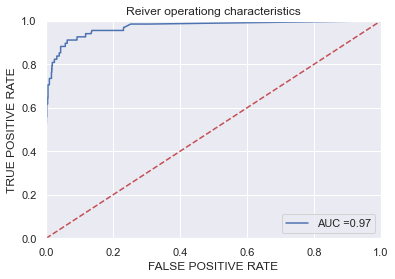

In [86]:
roc_auc_plot(rf,x_test,y_test)

#  Catboost classifier without balanced data:

In [87]:
from catboost import CatBoostClassifier

In [88]:
catboost = CatBoostClassifier()

In [89]:
catboost.fit(x_train,y_train)

Learning rate set to 0.025035
0:	learn: 0.6488959	total: 5.57ms	remaining: 5.57s
1:	learn: 0.6024339	total: 13.1ms	remaining: 6.53s
2:	learn: 0.5690201	total: 20.1ms	remaining: 6.68s
3:	learn: 0.5304670	total: 28.6ms	remaining: 7.12s
4:	learn: 0.4923626	total: 37.6ms	remaining: 7.49s
5:	learn: 0.4636676	total: 50.6ms	remaining: 8.38s
6:	learn: 0.4323207	total: 57.6ms	remaining: 8.17s
7:	learn: 0.4073535	total: 64.9ms	remaining: 8.04s
8:	learn: 0.3828289	total: 73.8ms	remaining: 8.12s
9:	learn: 0.3592015	total: 83ms	remaining: 8.21s
10:	learn: 0.3303689	total: 92.7ms	remaining: 8.33s
11:	learn: 0.3148401	total: 103ms	remaining: 8.48s
12:	learn: 0.2994565	total: 113ms	remaining: 8.6s
13:	learn: 0.2831427	total: 124ms	remaining: 8.71s
14:	learn: 0.2693445	total: 134ms	remaining: 8.81s
15:	learn: 0.2561612	total: 142ms	remaining: 8.74s
16:	learn: 0.2462817	total: 155ms	remaining: 8.95s
17:	learn: 0.2298290	total: 162ms	remaining: 8.83s
18:	learn: 0.2213928	total: 171ms	remaining: 8.82s
19:

165:	learn: 0.0463397	total: 1.27s	remaining: 6.4s
166:	learn: 0.0462333	total: 1.28s	remaining: 6.38s
167:	learn: 0.0461875	total: 1.28s	remaining: 6.36s
168:	learn: 0.0459694	total: 1.29s	remaining: 6.34s
169:	learn: 0.0459167	total: 1.3s	remaining: 6.33s
170:	learn: 0.0458479	total: 1.3s	remaining: 6.32s
171:	learn: 0.0457669	total: 1.31s	remaining: 6.31s
172:	learn: 0.0456723	total: 1.32s	remaining: 6.31s
173:	learn: 0.0456492	total: 1.33s	remaining: 6.3s
174:	learn: 0.0456106	total: 1.34s	remaining: 6.3s
175:	learn: 0.0454901	total: 1.34s	remaining: 6.29s
176:	learn: 0.0452748	total: 1.35s	remaining: 6.29s
177:	learn: 0.0452014	total: 1.36s	remaining: 6.27s
178:	learn: 0.0451480	total: 1.36s	remaining: 6.26s
179:	learn: 0.0450091	total: 1.37s	remaining: 6.25s
180:	learn: 0.0449028	total: 1.38s	remaining: 6.25s
181:	learn: 0.0448009	total: 1.39s	remaining: 6.24s
182:	learn: 0.0447639	total: 1.4s	remaining: 6.24s
183:	learn: 0.0446292	total: 1.41s	remaining: 6.24s
184:	learn: 0.0445

330:	learn: 0.0344447	total: 2.35s	remaining: 4.76s
331:	learn: 0.0343827	total: 2.36s	remaining: 4.75s
332:	learn: 0.0343417	total: 2.36s	remaining: 4.73s
333:	learn: 0.0342246	total: 2.37s	remaining: 4.72s
334:	learn: 0.0342004	total: 2.38s	remaining: 4.71s
335:	learn: 0.0341452	total: 2.38s	remaining: 4.7s
336:	learn: 0.0340840	total: 2.38s	remaining: 4.69s
337:	learn: 0.0340718	total: 2.39s	remaining: 4.68s
338:	learn: 0.0340426	total: 2.4s	remaining: 4.67s
339:	learn: 0.0339545	total: 2.4s	remaining: 4.66s
340:	learn: 0.0339151	total: 2.4s	remaining: 4.65s
341:	learn: 0.0338679	total: 2.41s	remaining: 4.64s
342:	learn: 0.0338514	total: 2.42s	remaining: 4.63s
343:	learn: 0.0338132	total: 2.42s	remaining: 4.62s
344:	learn: 0.0337912	total: 2.43s	remaining: 4.61s
345:	learn: 0.0337595	total: 2.43s	remaining: 4.6s
346:	learn: 0.0337129	total: 2.44s	remaining: 4.59s
347:	learn: 0.0336665	total: 2.44s	remaining: 4.58s
348:	learn: 0.0336283	total: 2.45s	remaining: 4.57s
349:	learn: 0.033

490:	learn: 0.0284328	total: 3.24s	remaining: 3.36s
491:	learn: 0.0284223	total: 3.25s	remaining: 3.35s
492:	learn: 0.0284211	total: 3.25s	remaining: 3.34s
493:	learn: 0.0283793	total: 3.26s	remaining: 3.34s
494:	learn: 0.0283440	total: 3.26s	remaining: 3.33s
495:	learn: 0.0283238	total: 3.26s	remaining: 3.32s
496:	learn: 0.0282849	total: 3.27s	remaining: 3.31s
497:	learn: 0.0282398	total: 3.27s	remaining: 3.3s
498:	learn: 0.0281959	total: 3.28s	remaining: 3.29s
499:	learn: 0.0281820	total: 3.28s	remaining: 3.28s
500:	learn: 0.0281639	total: 3.29s	remaining: 3.28s
501:	learn: 0.0281416	total: 3.3s	remaining: 3.27s
502:	learn: 0.0281009	total: 3.3s	remaining: 3.26s
503:	learn: 0.0280750	total: 3.31s	remaining: 3.25s
504:	learn: 0.0280633	total: 3.31s	remaining: 3.24s
505:	learn: 0.0280263	total: 3.31s	remaining: 3.24s
506:	learn: 0.0280178	total: 3.32s	remaining: 3.23s
507:	learn: 0.0279819	total: 3.33s	remaining: 3.22s
508:	learn: 0.0279721	total: 3.33s	remaining: 3.21s
509:	learn: 0.0

658:	learn: 0.0237053	total: 4.14s	remaining: 2.14s
659:	learn: 0.0236739	total: 4.14s	remaining: 2.13s
660:	learn: 0.0236619	total: 4.15s	remaining: 2.13s
661:	learn: 0.0236413	total: 4.15s	remaining: 2.12s
662:	learn: 0.0236041	total: 4.16s	remaining: 2.11s
663:	learn: 0.0235678	total: 4.17s	remaining: 2.11s
664:	learn: 0.0235419	total: 4.17s	remaining: 2.1s
665:	learn: 0.0235276	total: 4.17s	remaining: 2.09s
666:	learn: 0.0235103	total: 4.18s	remaining: 2.09s
667:	learn: 0.0235011	total: 4.19s	remaining: 2.08s
668:	learn: 0.0234663	total: 4.19s	remaining: 2.07s
669:	learn: 0.0234595	total: 4.2s	remaining: 2.07s
670:	learn: 0.0234409	total: 4.21s	remaining: 2.06s
671:	learn: 0.0234178	total: 4.21s	remaining: 2.06s
672:	learn: 0.0234081	total: 4.22s	remaining: 2.05s
673:	learn: 0.0233843	total: 4.22s	remaining: 2.04s
674:	learn: 0.0233371	total: 4.23s	remaining: 2.04s
675:	learn: 0.0233018	total: 4.23s	remaining: 2.03s
676:	learn: 0.0232756	total: 4.24s	remaining: 2.02s
677:	learn: 0.

818:	learn: 0.0201193	total: 5.03s	remaining: 1.11s
819:	learn: 0.0201097	total: 5.03s	remaining: 1.1s
820:	learn: 0.0200823	total: 5.04s	remaining: 1.1s
821:	learn: 0.0200616	total: 5.05s	remaining: 1.09s
822:	learn: 0.0200450	total: 5.05s	remaining: 1.09s
823:	learn: 0.0200362	total: 5.06s	remaining: 1.08s
824:	learn: 0.0200184	total: 5.06s	remaining: 1.07s
825:	learn: 0.0200064	total: 5.07s	remaining: 1.07s
826:	learn: 0.0199568	total: 5.07s	remaining: 1.06s
827:	learn: 0.0199480	total: 5.08s	remaining: 1.05s
828:	learn: 0.0199307	total: 5.08s	remaining: 1.05s
829:	learn: 0.0199014	total: 5.09s	remaining: 1.04s
830:	learn: 0.0198773	total: 5.09s	remaining: 1.04s
831:	learn: 0.0198594	total: 5.1s	remaining: 1.03s
832:	learn: 0.0198511	total: 5.1s	remaining: 1.02s
833:	learn: 0.0198506	total: 5.11s	remaining: 1.02s
834:	learn: 0.0198340	total: 5.12s	remaining: 1.01s
835:	learn: 0.0198148	total: 5.12s	remaining: 1s
836:	learn: 0.0198039	total: 5.13s	remaining: 999ms
837:	learn: 0.01975

985:	learn: 0.0174984	total: 5.92s	remaining: 84ms
986:	learn: 0.0174741	total: 5.92s	remaining: 78ms
987:	learn: 0.0174640	total: 5.93s	remaining: 72ms
988:	learn: 0.0174502	total: 5.93s	remaining: 66ms
989:	learn: 0.0174309	total: 5.94s	remaining: 60ms
990:	learn: 0.0174244	total: 5.95s	remaining: 54ms
991:	learn: 0.0174116	total: 5.95s	remaining: 48ms
992:	learn: 0.0174049	total: 5.96s	remaining: 42ms
993:	learn: 0.0174008	total: 5.97s	remaining: 36ms
994:	learn: 0.0173850	total: 5.97s	remaining: 30ms
995:	learn: 0.0173752	total: 5.98s	remaining: 24ms
996:	learn: 0.0173687	total: 5.98s	remaining: 18ms
997:	learn: 0.0173616	total: 5.99s	remaining: 12ms
998:	learn: 0.0173550	total: 6s	remaining: 6ms
999:	learn: 0.0173382	total: 6s	remaining: 0us


In [90]:
y_train_pred_cat = catboost.predict(x_train)
y_test_pred_cat= catboost.predict(x_test)

In [91]:
print("Training acuuracy_cat:",accuracy_score(y_train,y_train_pred_cat))
print("Testing acuuracy_cat:",accuracy_score(y_test,y_test_pred_cat))

Training acuuracy_cat: 0.9965
Testing acuuracy_cat: 0.9855


In [92]:
print(classification_report(y_test,y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.85      0.69      0.76        68

    accuracy                           0.99      2000
   macro avg       0.92      0.84      0.88      2000
weighted avg       0.98      0.99      0.98      2000



In [93]:
confusion_matrix(y_test,y_test_pred_cat)

array([[1924,    8],
       [  21,   47]], dtype=int64)

In [122]:
# pip install pycaret

In [95]:
from pycaret.classification import *

In [96]:
exp_clf = setup(data = df1,target = 'Target',session_id =124)

,Description,Value
0,Session id,124
1,Target,Target
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 7)"
5,Transformed train set shape,"(7000, 7)"
6,Transformed test set shape,"(3000, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [97]:
# comparing models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9854,0.9706,0.6413,0.9037,0.7473,0.7401,0.7531,0.4800
lightgbm,Light Gradient Boosting Machine,0.9849,0.9694,0.6489,0.8796,0.7427,0.7351,0.7462,0.5770
xgboost,Extreme Gradient Boosting,0.9844,0.9702,0.6453,0.8693,0.7337,0.7259,0.7380,0.4000
gbc,Gradient Boosting Classifier,0.9837,0.9692,0.6332,0.8548,0.7245,0.7163,0.7264,0.3080
rf,Random Forest Classifier,0.9834,0.9647,0.5788,0.9047,0.6985,0.6905,0.7125,0.4120
et,Extra Trees Classifier,0.9796,0.9600,0.4219,0.9509,0.5819,0.5731,0.6245,0.3430
dt,Decision Tree Classifier,0.9760,0.8349,0.6835,0.6355,0.6558,0.6434,0.6454,0.4280
ada,Ada Boost Classifier,0.9729,0.9361,0.4217,0.6593,0.5104,0.4972,0.5124,0.4830
lr,Logistic Regression,0.9700,0.8930,0.1984,0.7141,0.3067,0.2965,0.3631,1.2900
lda,Linear Discriminant Analysis,0.9689,0.8694,0.3464,0.5718,0.4280,0.4131,0.4284,0.2880


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [98]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9871,0.9941,0.7391,0.8500,0.7907,0.7841,0.7861
1,0.9871,0.9100,0.6522,0.9375,0.7692,0.7628,0.7762
2,0.9843,0.9624,0.5217,1.0000,0.6857,0.6785,0.7165
3,0.9800,0.9822,0.4583,0.9167,0.6111,0.6020,0.6404
4,0.9843,0.9909,0.5417,1.0000,0.7027,0.6954,0.7301
5,0.9843,0.9782,0.7083,0.8095,0.7556,0.7475,0.7493
6,0.9786,0.9684,0.4583,0.8462,0.5946,0.5846,0.6138
7,0.9829,0.9611,0.6250,0.8333,0.7143,0.7056,0.7134
8,0.9857,0.9394,0.6250,0.9375,0.7500,0.7429,0.7592


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [99]:
catboost =create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9814,0.9934,0.6522,0.7500,0.6977,0.6881,0.6899
1,0.9829,0.9318,0.6087,0.8235,0.7000,0.6914,0.6998
2,0.9871,0.9702,0.6522,0.9375,0.7692,0.7628,0.7762
3,0.9829,0.9852,0.6250,0.8333,0.7143,0.7056,0.7134
4,0.9871,0.9948,0.7083,0.8947,0.7907,0.7842,0.7899
5,0.9929,0.9871,0.7917,1.0000,0.8837,0.8801,0.8865
6,0.9814,0.9732,0.5000,0.9231,0.6486,0.6400,0.6719
7,0.9857,0.9660,0.6250,0.9375,0.7500,0.7429,0.7592
8,0.9871,0.9249,0.6250,1.0000,0.7692,0.7630,0.7854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
tuned_model=tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9930,0.7826,0.7826,0.7826,0.7752,0.7752
1,0.9829,0.9055,0.6087,0.8235,0.7000,0.6914,0.6998
2,0.9886,0.9579,0.6522,1.0000,0.7895,0.7839,0.8028
3,0.9829,0.9812,0.6667,0.8000,0.7273,0.7185,0.7217
4,0.9914,0.9908,0.8333,0.9091,0.8696,0.8651,0.8660
5,0.9871,0.9917,0.7500,0.8571,0.8000,0.7934,0.7953
6,0.9829,0.9421,0.6250,0.8333,0.7143,0.7056,0.7134
7,0.9829,0.9496,0.6667,0.8000,0.7273,0.7185,0.7217
8,0.9871,0.9529,0.6250,1.0000,0.7692,0.7630,0.7854


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [101]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Let's try with balancing of dataset:

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
smote = SMOTE()

In [104]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [105]:
y_smote.value_counts()

0    7729
1    7729
Name: Target, dtype: int64

#  RandomForestClassifier with balanced data

In [106]:
rf = RandomForestClassifier(min_samples_split =5,max_depth = 100)

In [107]:
rf.fit(x_smote,y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [108]:
y_train_pred_rf = rf.predict(x_smote)
y_test_pred_rf= rf.predict(x_test)

In [109]:
print("Training acuuracy:",accuracy_score(y_smote,y_train_pred_rf))
print("Testing acuuracy:",accuracy_score(y_test,y_test_pred_rf))

Training acuuracy: 0.9996118514684953
Testing acuuracy: 0.9685


In [110]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.52      0.81      0.64        68

    accuracy                           0.97      2000
   macro avg       0.76      0.89      0.81      2000
weighted avg       0.98      0.97      0.97      2000



In [111]:
confusion_matrix(y_test,y_test_pred_rf)

array([[1882,   50],
       [  13,   55]], dtype=int64)

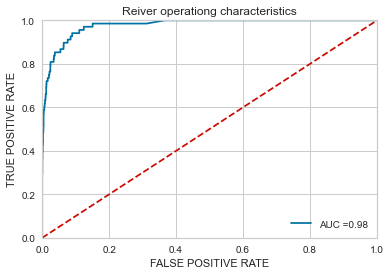

In [112]:
roc_auc_plot(rf,x_test,y_test)

# Observations : 
    1. with balancing of data there is improvement in Recall
    2 . with good accuracy of 97%

#  Catboost with balnced data:

In [113]:
catboost.fit(x_smote,y_smote)

In [114]:
y_train_pred_cat = catboost.predict(x_smote)
y_test_pred_cat= catboost.predict(x_test)

In [115]:
print("Training acuuracy_cat:",accuracy_score(y_smote,y_train_pred_cat))
print("Testing acuuracy_cat:",accuracy_score(y_test,y_test_pred_cat))

Training acuuracy_cat: 0.9967654289041273
Testing acuuracy_cat: 0.964


In [116]:
print(classification_report(y_test,y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.48      0.81      0.60        68

    accuracy                           0.96      2000
   macro avg       0.74      0.89      0.79      2000
weighted avg       0.98      0.96      0.97      2000



In [117]:
confusion_matrix(y_test,y_test_pred_cat)

array([[1873,   59],
       [  13,   55]], dtype=int64)

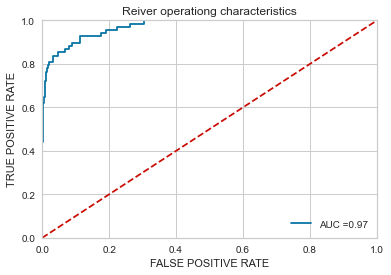

In [118]:
roc_auc_plot(catboost,x_test,y_test)

#  conclusion :

## 1). Randomforest and Catboost both are giving good training and testing accuracy
## 2). Recall value of both random forest and Catboost are same 81% which is main concern for this model
## 3). both the models are giving good AUC = 97%(catboost) and AUC =98% (RandomForest)